Loaded 61226 SCI features.
Running national by 32 states at res=7...


States:   3%|█▊                                                      | 1/32 [00:00<00:04,  7.64it/s]

ENT 1: hex=34 | weighted_rows=34


States:   9%|█████▎                                                  | 3/32 [00:00<00:06,  4.46it/s]

ENT 2: hex=130 | weighted_rows=130
ENT 3: hex=44 | weighted_rows=44


States:  12%|███████                                                 | 4/32 [00:00<00:04,  5.66it/s]

ENT 4: hex=44 | weighted_rows=44


States:  19%|██████████▌                                             | 6/32 [00:01<00:05,  5.14it/s]

ENT 5: hex=134 | weighted_rows=134
ENT 6: hex=33 | weighted_rows=33


States:  22%|████████████▎                                           | 7/32 [00:01<00:06,  4.06it/s]

ENT 7: hex=148 | weighted_rows=148


States:  25%|██████████████                                          | 8/32 [00:02<00:07,  3.27it/s]

ENT 8: hex=184 | weighted_rows=184


States:  28%|███████████████▊                                        | 9/32 [00:02<00:08,  2.78it/s]

ENT 9: hex=134 | weighted_rows=134


States:  31%|█████████████████▏                                     | 10/32 [00:02<00:06,  3.15it/s]

ENT 10: hex=60 | weighted_rows=60


States:  34%|██████████████████▉                                    | 11/32 [00:03<00:08,  2.59it/s]

ENT 11: hex=139 | weighted_rows=139


States:  38%|████████████████████▋                                  | 12/32 [00:03<00:08,  2.35it/s]

ENT 12: hex=100 | weighted_rows=100


States:  41%|██████████████████████▎                                | 13/32 [00:04<00:07,  2.51it/s]

ENT 13: hex=127 | weighted_rows=127


States:  44%|████████████████████████                               | 14/32 [00:04<00:08,  2.00it/s]

ENT 14: hex=224 | weighted_rows=224


States:  47%|█████████████████████████▊                             | 15/32 [00:05<00:11,  1.50it/s]

ENT 15: hex=410 | weighted_rows=410


States:  50%|███████████████████████████▌                           | 16/32 [00:06<00:10,  1.59it/s]

ENT 16: hex=174 | weighted_rows=174


States:  56%|██████████████████████████████▉                        | 18/32 [00:06<00:05,  2.41it/s]

ENT 17: hex=68 | weighted_rows=68
ENT 18: hex=26 | weighted_rows=26


States:  59%|████████████████████████████████▋                      | 19/32 [00:07<00:05,  2.22it/s]

ENT 19: hex=188 | weighted_rows=188


States:  62%|██████████████████████████████████▍                    | 20/32 [00:08<00:06,  1.78it/s]

ENT 20: hex=226 | weighted_rows=226


States:  69%|█████████████████████████████████████▊                 | 22/32 [00:09<00:04,  2.12it/s]

ENT 21: hex=285 | weighted_rows=285
ENT 22: hex=69 | weighted_rows=69


States:  72%|███████████████████████████████████████▌               | 23/32 [00:09<00:03,  2.63it/s]

ENT 23: hex=72 | weighted_rows=72


States:  75%|█████████████████████████████████████████▎             | 24/32 [00:09<00:02,  2.94it/s]

ENT 24: hex=74 | weighted_rows=74


States:  78%|██████████████████████████████████████████▉            | 25/32 [00:09<00:02,  3.13it/s]

ENT 25: hex=83 | weighted_rows=83


States:  84%|██████████████████████████████████████████████▍        | 27/32 [00:10<00:01,  3.48it/s]

ENT 26: hex=143 | weighted_rows=143
ENT 27: hex=67 | weighted_rows=67


States:  88%|████████████████████████████████████████████████▏      | 28/32 [00:10<00:01,  3.17it/s]

ENT 28: hex=153 | weighted_rows=153


States:  91%|█████████████████████████████████████████████████▊     | 29/32 [00:10<00:00,  3.50it/s]

ENT 29: hex=102 | weighted_rows=102


States:  94%|███████████████████████████████████████████████████▌   | 30/32 [00:11<00:00,  2.63it/s]

ENT 30: hex=205 | weighted_rows=205


States:  97%|█████████████████████████████████████████████████████▎ | 31/32 [00:11<00:00,  2.87it/s]

ENT 31: hex=143 | weighted_rows=143


States: 100%|███████████████████████████████████████████████████████| 32/32 [00:12<00:00,  2.66it/s]

ENT 32: hex=52 | weighted_rows=52
National hex output: 4075 features | 12.1s


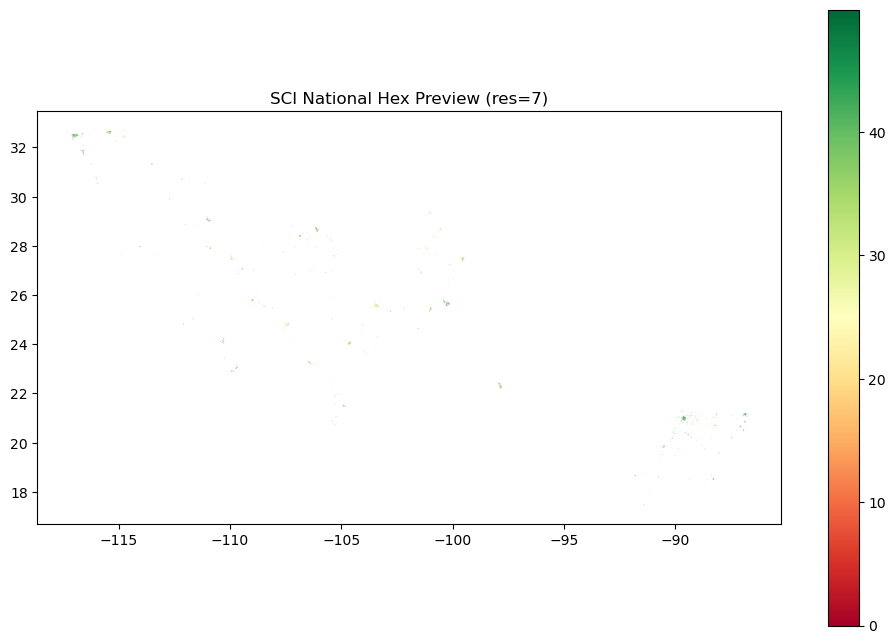

Exported national hex to ../data/processed/hex-grids/mexico_sci_hex_res7.geojson.


In [76]:
import geopandas as gpd
import pandas as pd
import numpy as np
import h3
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import time

# Load SCI GeoParquet
geo_path = '../data/processed/indices/sci_national.parquet'
ageb_sci = gpd.read_parquet(geo_path)
print(f"Loaded {len(ageb_sci)} SCI features.")

# Config
RUN_NATIONAL = True
RESOLUTIONS = [7, 8, 9]  # Generate for res 7, 8, 9

def _cells_from_polygon(poly, resolution):
    if hasattr(h3, 'polygon_to_cells') and hasattr(h3, 'LatLngPoly'):
        exterior = [(lat, lon) for lon, lat in poly.exterior.coords]
        holes = [[(lat, lon) for lon, lat in ring.coords] for ring in poly.interiors]
        return set(h3.polygon_to_cells(h3.LatLngPoly(exterior, *holes), resolution))
    return set(h3.polyfill(poly.__geo_interface__, resolution))

def h3_cells_from_geometry(geom, resolution):
    if geom is None or geom.is_empty:
        return set()
    if isinstance(geom, Polygon):
        return _cells_from_polygon(geom, resolution)
    if isinstance(geom, MultiPolygon):
        out = set()
        for p in geom.geoms:
            out.update(_cells_from_polygon(p, resolution))
        return out
    return set()

def h3_cell_to_polygon(cell):
    if hasattr(h3, 'cell_to_boundary'):
        boundary = h3.cell_to_boundary(cell)
        return Polygon([(lon, lat) for lat, lon in boundary])
    boundary = h3.h3_to_geo_boundary(cell, geo_json=True)
    return Polygon(boundary)

def generate_hex_grid(gdf, resolution=8):
    hex_ids = set()
    for _, row in gdf.iterrows():
        hex_ids.update(h3_cells_from_geometry(row.geometry, resolution))
    hex_list = list(hex_ids)
    hex_polys = [h3_cell_to_polygon(h) for h in hex_list]
    return gpd.GeoDataFrame({'hex_id': hex_list}, geometry=hex_polys, crs='EPSG:4326')

def get_weight_sums(hex_gdf, sci_gdf):
    inter = gpd.overlay(
        hex_gdf[['hex_id', 'geometry']],
        sci_gdf[['SCI', 'geometry']],
        how='intersection'
    )
    if inter.empty:
        return pd.DataFrame(columns=['hex_id', 'w_sci', 'w_area'])
    inter_m = inter.to_crs('EPSG:3857')
    inter_m['w_area'] = inter_m.geometry.area
    inter_m['w_sci'] = inter_m['SCI'] * inter_m['w_area']
    return inter_m.groupby('hex_id', as_index=False)[['w_sci', 'w_area']].sum()

def finalize_from_sums(weight_sums, neutral_value=50):
    if weight_sums.empty:
        return gpd.GeoDataFrame(columns=['hex_id', 'SCI', 'geometry'], geometry='geometry', crs='EPSG:4326')
    sums = weight_sums.copy()
    sums['SCI'] = np.where(sums['w_area'] > 0, sums['w_sci'] / sums['w_area'], neutral_value)
    unique_hex_ids = sums['hex_id'].unique().tolist()
    hex_polys = [h3_cell_to_polygon(h) for h in unique_hex_ids]
    hex_gdf = gpd.GeoDataFrame({'hex_id': unique_hex_ids}, geometry=hex_polys, crs='EPSG:4326')
    out = hex_gdf.merge(sums[['hex_id', 'SCI']], on='hex_id', how='left')
    out['SCI'] = out['SCI'].fillna(neutral_value)
    return gpd.GeoDataFrame(out, geometry='geometry', crs='EPSG:4326')

if RUN_NATIONAL:
    state_codes = sorted(ageb_sci['ENTIDAD'].dropna().unique().tolist())
    print(f"Running national by {len(state_codes)} states...")
    
    # Loop over resolutions 7, 8, 9
    for resolution in RESOLUTIONS:
        print(f"\n--- Processing Resolution {resolution} ---")
        t0 = time.time()
        
        all_sums = []
        for ent in tqdm(state_codes, desc=f'Res {resolution} - States'):
            state_gdf = ageb_sci[ageb_sci['ENTIDAD'] == ent].copy()
            if state_gdf.empty:
                continue
            state_hex = generate_hex_grid(state_gdf, resolution=resolution)
            state_sums = get_weight_sums(state_hex, state_gdf)
            if not state_sums.empty:
                all_sums.append(state_sums)
            print(f"ENT {ent}: hex={len(state_hex)} | weighted_rows={len(state_sums)}")

        if all_sums:
            national_sums = pd.concat(all_sums, ignore_index=True)
            national_sums = national_sums.groupby('hex_id', as_index=False)[['w_sci', 'w_area']].sum()
        else:
            national_sums = pd.DataFrame(columns=['hex_id', 'w_sci', 'w_area'])

        national_hex_sci = finalize_from_sums(national_sums)
        print(f"Res {resolution} hex output: {len(national_hex_sci)} features | {time.time()-t0:.1f}s")

        # Sample viz (first 1000 hexes)
        sample = national_hex_sci.head(1000)
        sample.plot(column='SCI', cmap='RdYlGn', legend=True, figsize=(12, 8))
        plt.title(f'SCI National Hex Preview (res={resolution})')
        plt.show()

        # Export
        output_path = Path(f'../data/processed/hex_grids/mexico_sci_hex_res{resolution}.geojson')
        output_path.parent.mkdir(parents=True, exist_ok=True)
        national_hex_sci.to_file(output_path, driver='GeoJSON')
        print(f"Exported res {resolution} to {output_path}.")
else:
    print('RUN_NATIONAL is False.')